# NBA DATASET EDA AND PREDICTION 

![](https://www.gannett-cdn.com/presto/2020/11/06/USAT/71a00cf8-a887-47dd-a51b-7b2ae070b7be-2020-11-05_NBA1.jpg?auto=webp&crop=1113,626,x1104,y825&format=pjpg&width=1200)

# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os 
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

# LOADING THE DATASET

In [2]:
data = pd.read_csv("/kaggle/input/unsupervised-ml/nba_2013.csv")
data.head()


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
data.columns


Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [4]:
data.describe()


,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [6]:
data.dtypes


player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [7]:
data.value_counts


<bound method DataFrame.value_counts of              player pos  age bref_team_id   g  gs    mp   fg   fga    fg.  \
0        Quincy Acy  SF   23          TOT  63   0   847   66   141  0.468   
1      Steven Adams   C   20          OKC  81  20  1197   93   185  0.503   
2       Jeff Adrien  PF   27          TOT  53  12   961  143   275  0.520   
3     Arron Afflalo  SG   28          ORL  73  73  2552  464  1011  0.459   
4     Alexis Ajinca   C   25          NOP  56  30   951  136   249  0.546   
..              ...  ..  ...          ...  ..  ..   ...  ...   ...    ...   
476     Tony Wroten  SG   20          PHI  72  16  1765  345   808  0.427   
477      Nick Young  SG   28          LAL  64   9  1810  387   889  0.435   
478  Thaddeus Young  PF   25          PHI  79  78  2718  582  1283  0.454   
479     Cody Zeller   C   21          CHA  82   3  1416  172   404  0.426   
480    Tyler Zeller   C   24          CLE  70   9  1049  156   290  0.538   

     ...  drb  trb  ast  stl  blk  

In [8]:
data.shape   #481 rows and 31 columns in our dataset

(481, 31)

In [9]:
data.var()


age               17.625433
g                641.239700
gs               879.624532
mp            805073.425156
fg             29526.508844
fga           136050.936694
fg.                0.009736
x3p             2586.295989
x3pa           17623.022393
x3p.               0.024848
x2p            21674.659174
x2pa           86538.668287
x2p.               0.010909
efg.               0.009911
ft             10746.997133
fta            17224.105198
ft.                0.025653
orb             3856.557883
drb            21126.074792
trb            40142.729972
ast            17166.124194
stl             1209.898146
blk              953.289172
tov             3931.501966
pf              5071.380726
pts           221297.072930
season_end         0.000000
dtype: float64

In [10]:
data.mean()

age             26.509356
g               53.253638
gs              25.571726
mp            1237.386694
fg             192.881497
fga            424.463617
fg.              0.436436
x3p             39.613306
x3pa           110.130977
x3p.             0.285111
x2p            153.268191
x2pa           314.332640
x2p.             0.466947
efg.             0.480752
ft              91.205821
fta            120.642412
ft.              0.722419
orb             55.810811
drb            162.817048
trb            218.627859
ast            112.536383
stl             39.280665
blk             24.103950
tov             71.862786
pf             105.869023
pts            516.582121
season_end    2013.000000
dtype: float64

# Exploratory Data Analysis

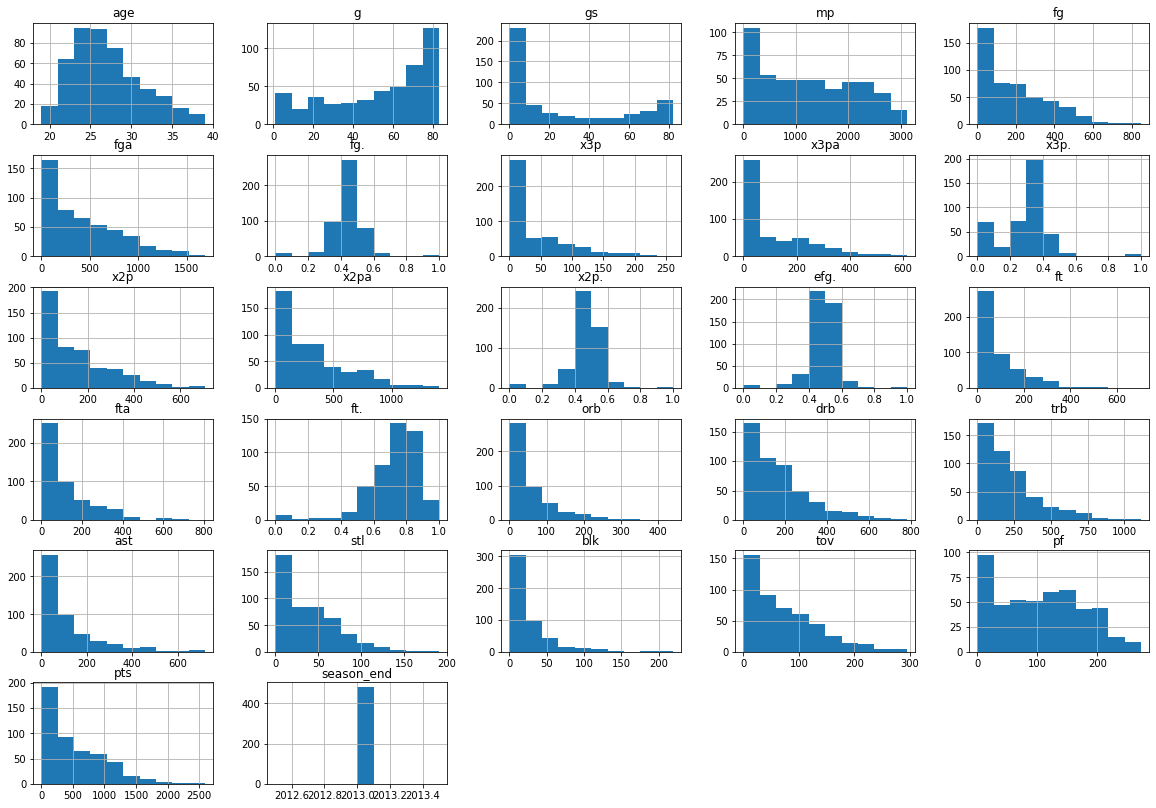

In [11]:
data.hist(figsize=(20,14))
plt.show()


<AxesSubplot:xlabel='pts', ylabel='pos'>

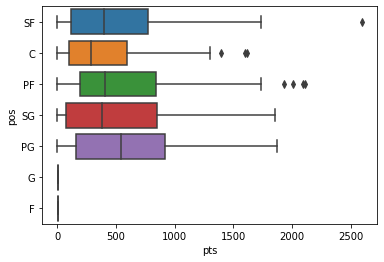

In [12]:
sns.boxplot(x="pts",y="pos",data=data)


<AxesSubplot:xlabel='g', ylabel='gs'>

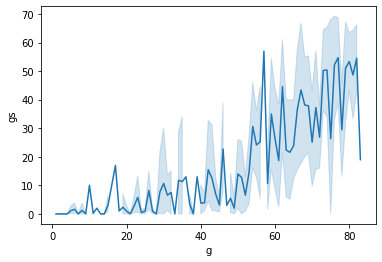

In [13]:
sns.lineplot(x="g",y="gs",data=data)


<AxesSubplot:xlabel='gs', ylabel='mp'>

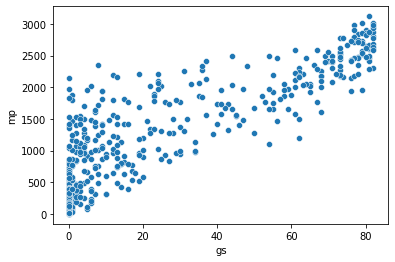

In [14]:
sns.scatterplot(x="gs",y="mp",data=data)


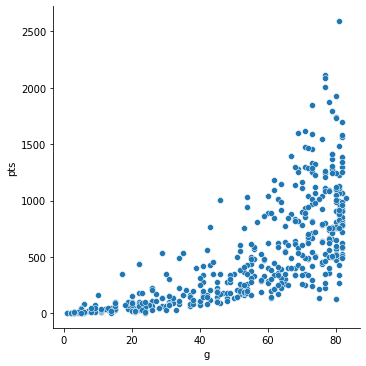

In [15]:
sns.relplot(x="g",y="pts",data=data)


<AxesSubplot:xlabel='pos', ylabel='pts'>

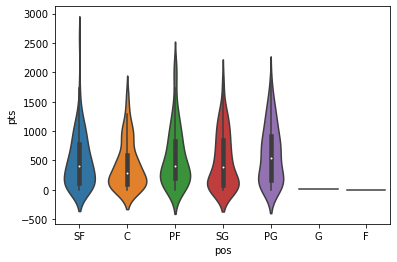

In [16]:
sns.violinplot(x="pos",y="pts",data=data)


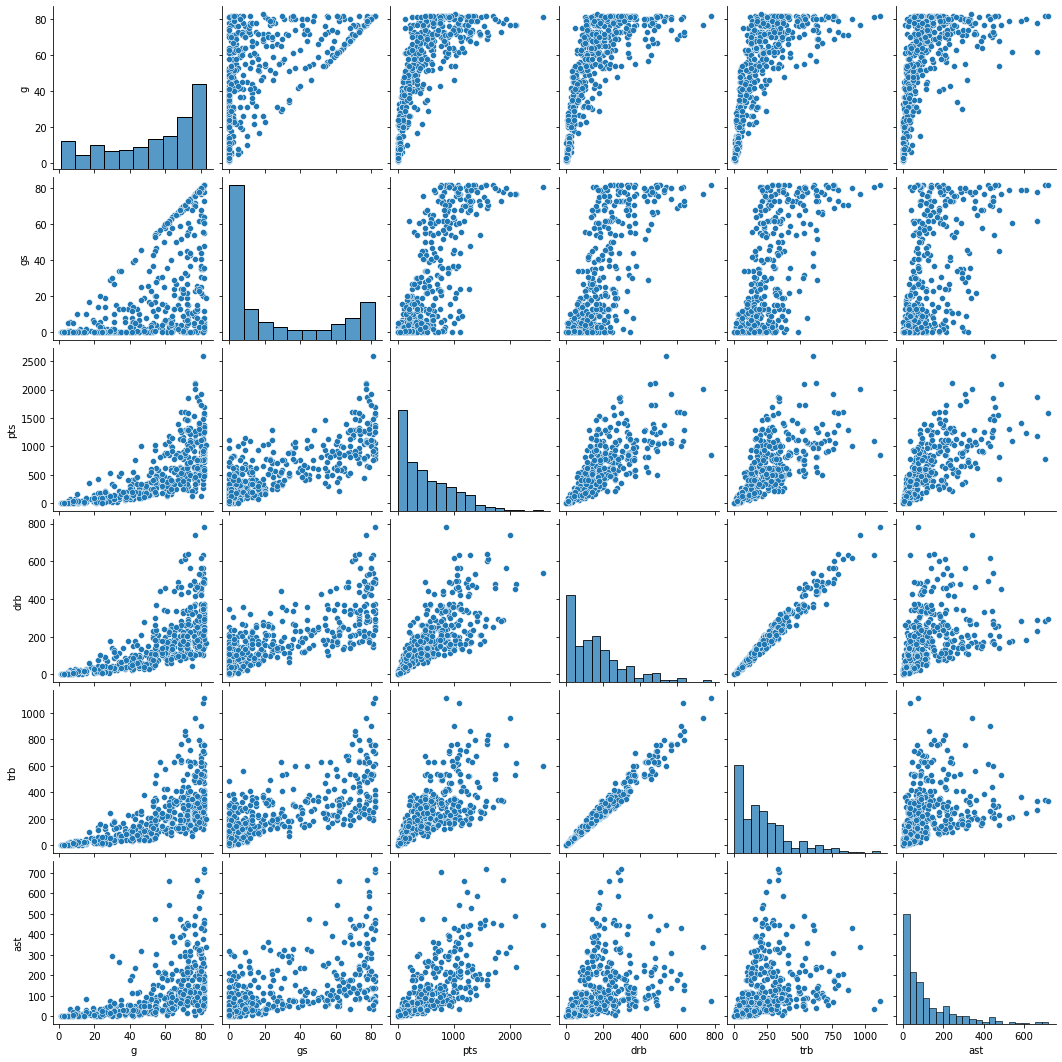

In [17]:
mean_col = ['pos','g','gs','pts','player','season','drb','trb','ast']

sns.pairplot(data[mean_col],palette='Accent_r')


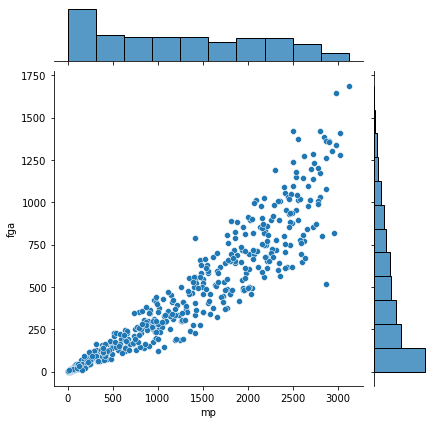

In [18]:
sns.jointplot(x="mp",y="fga",data=data)


<Figure size 1152x576 with 0 Axes>

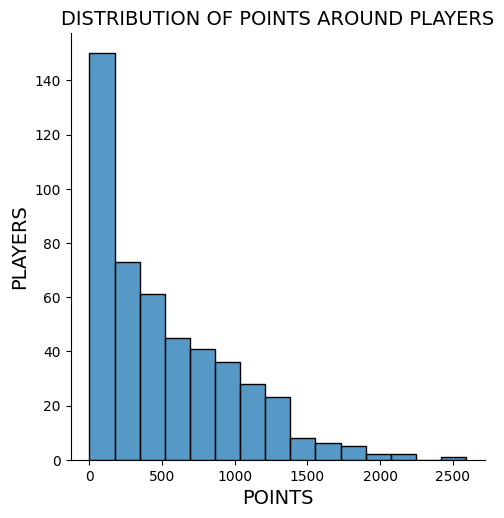

In [19]:
plt.figure(figsize=(16,8))
plt.style.use("default")
sns.displot(data["pts"])   #using displot here
plt.title("DISTRIBUTION OF POINTS AROUND PLAYERS",fontsize=14)
plt.xlabel("POINTS",fontsize=14)
plt.ylabel("PLAYERS",fontsize=14)
plt.show()



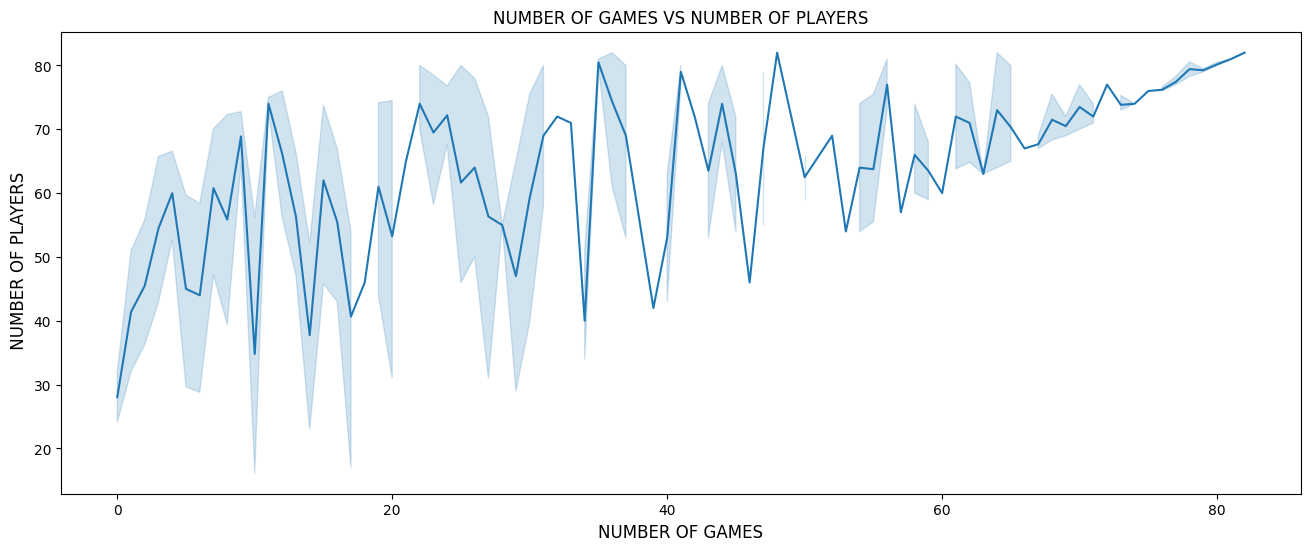

In [20]:
plt.figure(figsize=(16,6))
plt.style.use("default")
sns.lineplot(y="g",x="gs",data=data)
plt.title("NUMBER OF GAMES VS NUMBER OF PLAYERS",fontsize=12)
plt.xlabel("NUMBER OF GAMES",fontsize=12)
plt.ylabel(" NUMBER OF PLAYERS",fontsize=12)
plt.show()


<AxesSubplot:xlabel='fg'>

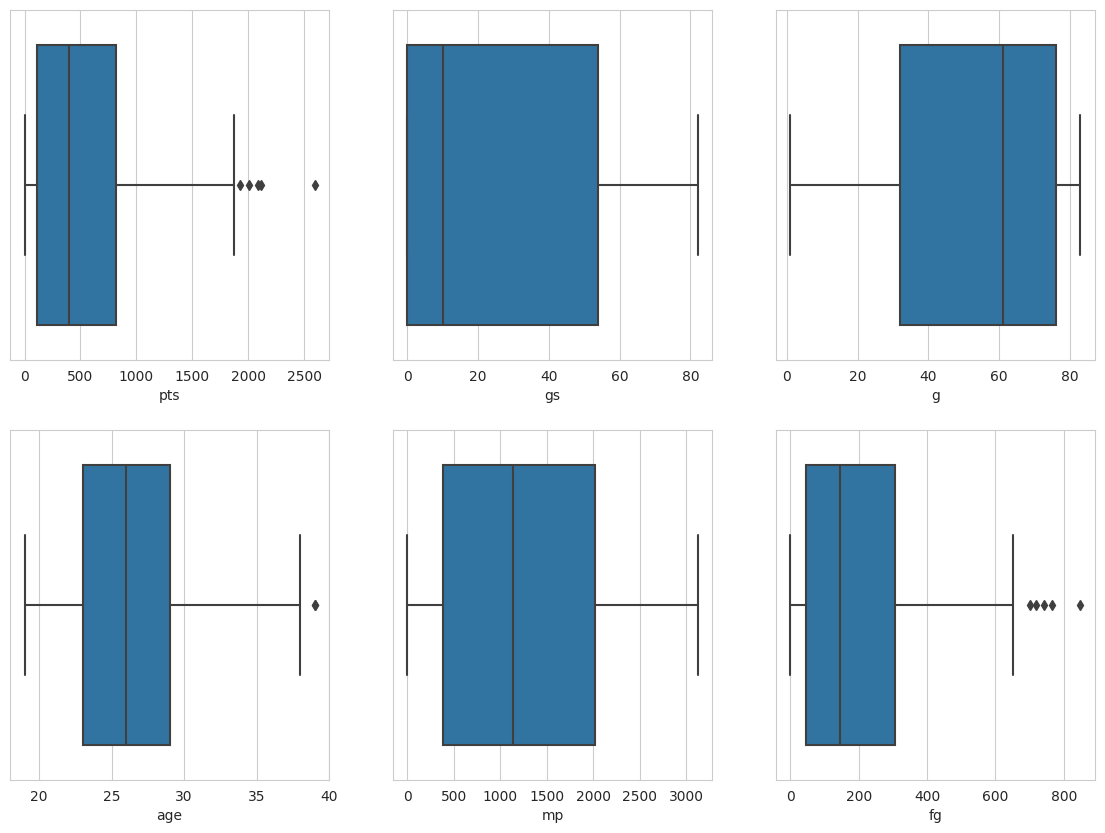

In [21]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='pts',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='gs',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='g',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='age',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='mp',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='fg',data=data)


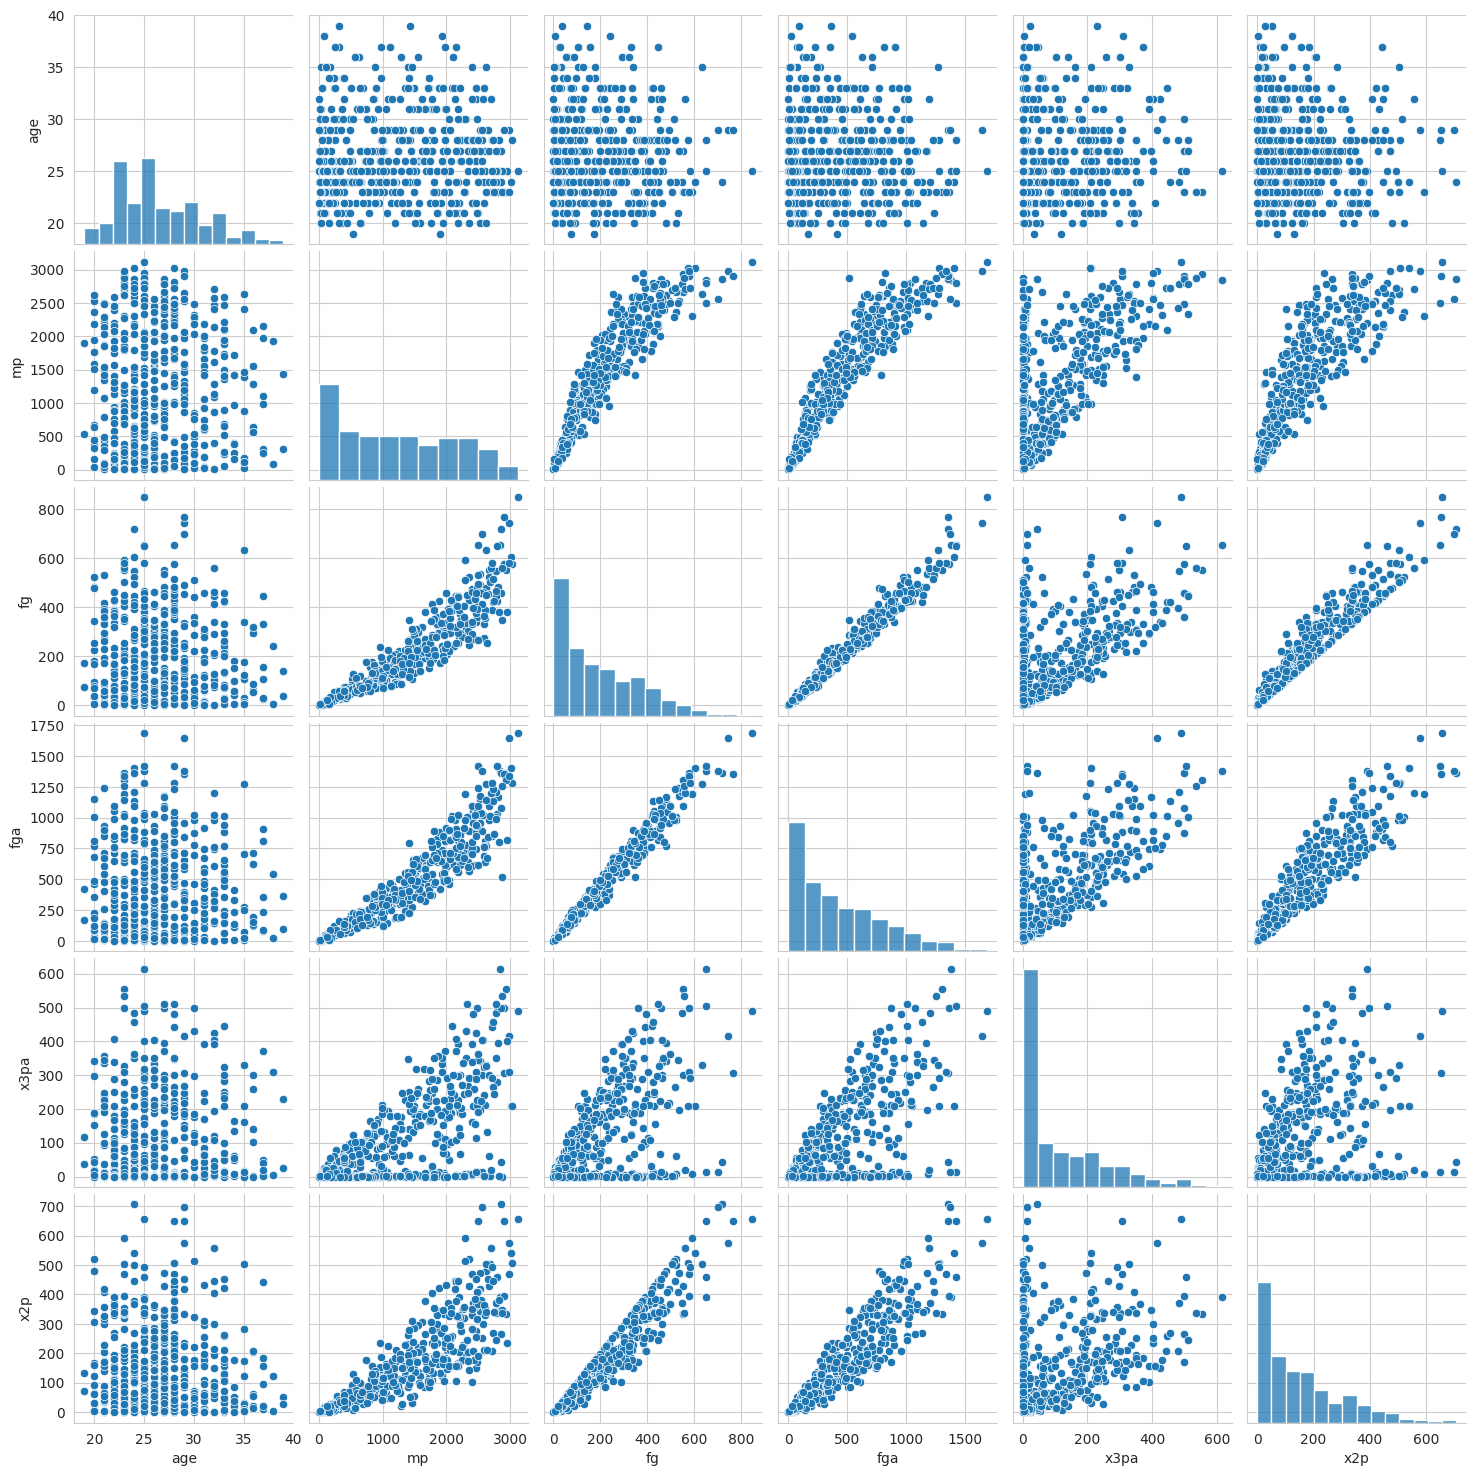

In [22]:
worst_col = ['age','mp','fg','fga','x3pa','x2p']

sns.pairplot(data[worst_col],palette='Accent')


**So from the exploratory data analysis we get to know that most number of points are scored in 2013-2014 season by NBA players.**

# Data Pre Processing

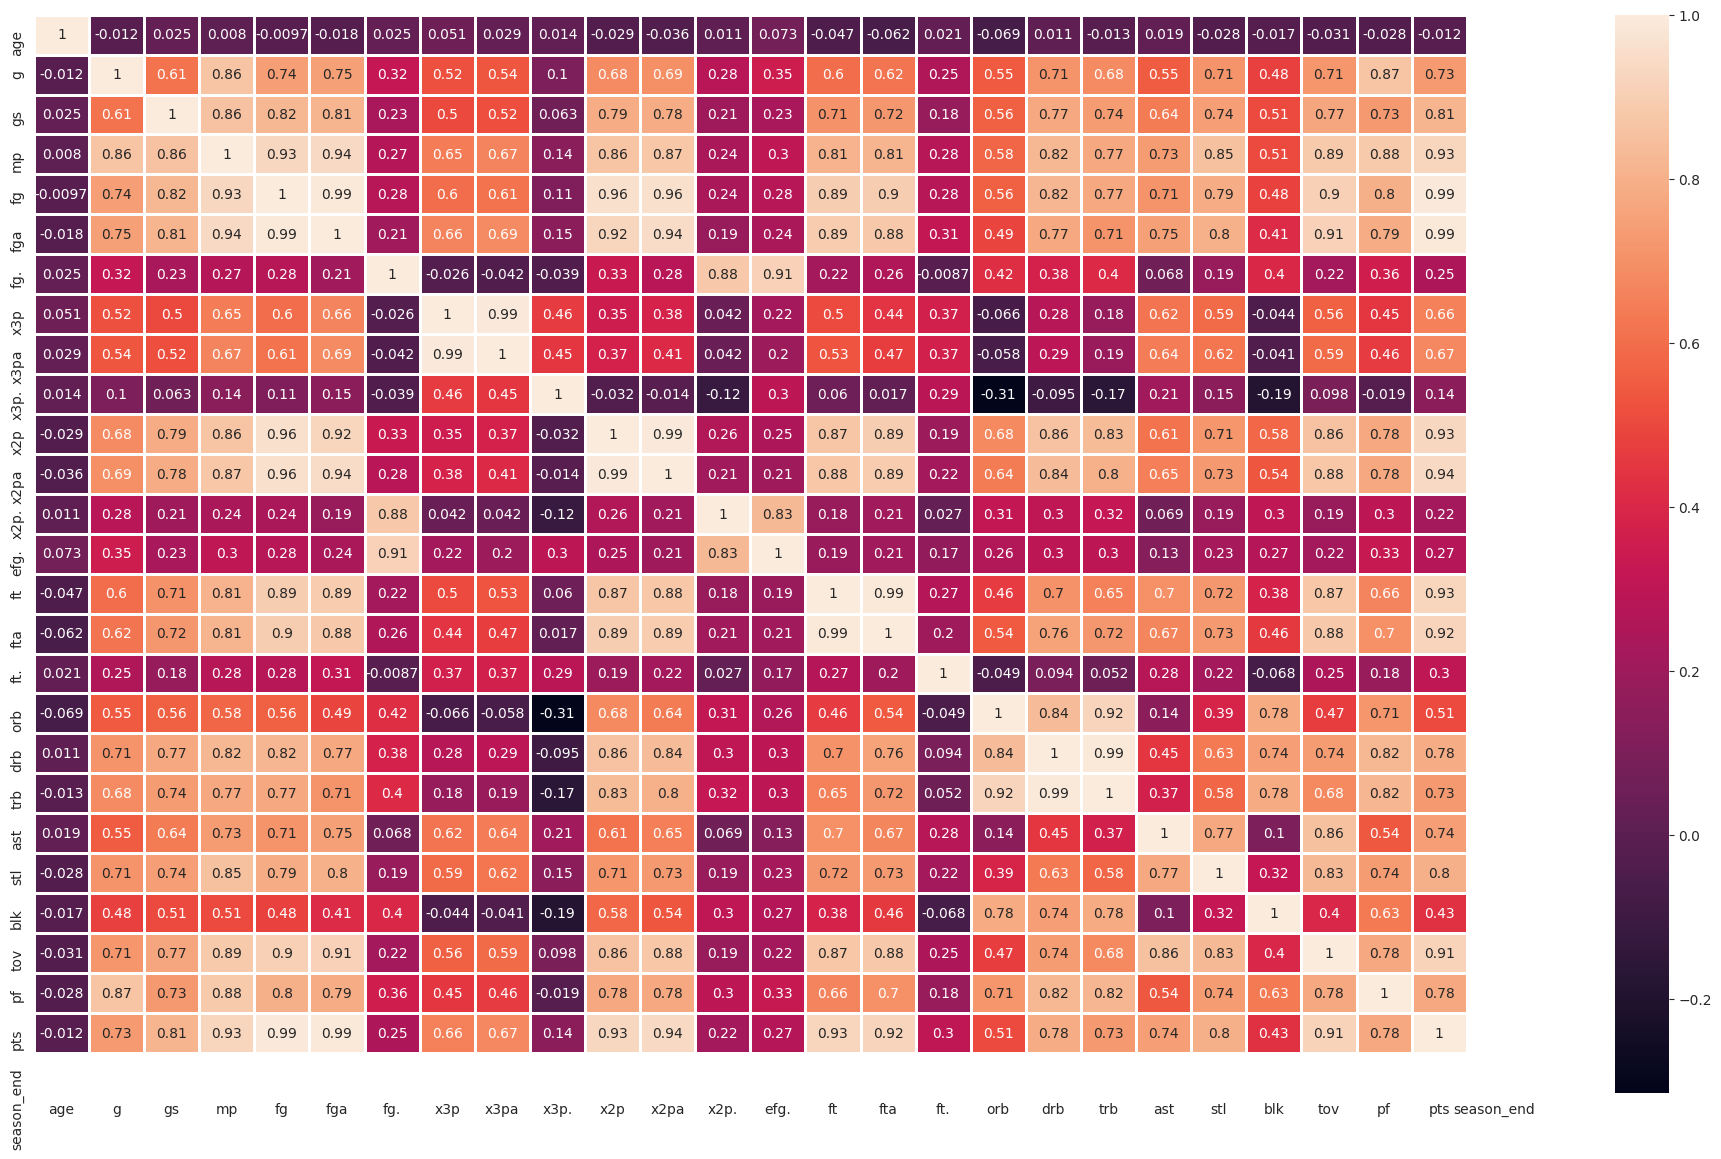

In [23]:
plt.figure(figsize = (24, 14))

corr = data.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()


**Checking Null Values**

In [24]:
data.isnull().sum()


player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [25]:
data=data.drop(['fg.','x3p.','ft.'],axis=1)


In [26]:
data=data.dropna()


In [27]:
data.isnull().sum()


player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
x3p             0
x3pa            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [28]:
data.corr()

,age,g,gs,mp,fg,fga,x3p,x3pa,x2p,x2pa,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
age,1.000000,-0.003197,0.029405,0.014369,-0.004529,-0.013010,0.054379,0.032803,-0.024098,-0.031129,...,-0.064850,0.016132,-0.008422,0.023306,-0.023283,-0.013776,-0.025635,-0.021521,-0.006846,NaN
g,-0.003197,1.000000,0.609110,0.863214,0.738038,0.744917,0.515884,0.534548,0.682473,0.691921,...,0.543790,0.704984,0.680082,0.548567,0.707253,0.472589,0.710988,0.863971,0.726519,NaN
gs,0.029405,0.609110,1.000000,0.859656,0.820702,0.810561,0.499767,0.513573,0.784482,0.783664,...,0.557915,0.773681,0.734292,0.634382,0.741768,0.503497,0.765846,0.724227,0.809300,NaN
mp,0.014369,0.863214,0.859656,1.000000,0.930623,0.936389,0.643467,0.664407,0.862992,0.873179,...,0.573966,0.819605,0.772582,0.731701,0.851083,0.503481,0.884421,0.883066,0.926987,NaN
fg,-0.004529,0.738038,0.820702,0.930623,1.000000,0.988169,0.595322,0.611945,0.960582,0.961779,...,0.559597,0.818852,0.767577,0.706649,0.784921,0.481538,0.902607,0.796990,0.991982,NaN
fga,-0.013010,0.744917,0.810561,0.936389,0.988169,1.000000,0.660458,0.683918,0.924245,0.944077,...,0.483906,0.769992,0.708651,0.746809,0.801707,0.409590,0.909953,0.784541,0.989136,NaN
x3p,0.054379,0.515884,0.499767,0.643467,0.595322,0.660458,1.000000,0.991677,0.348490,0.379480,...,-0.070421,0.276453,0.178665,0.616017,0.590149,-0.047613,0.558376,0.443513,0.653766,NaN
x3pa,0.032803,0.534548,0.513573,0.664407,0.611945,0.683918,0.991677,1.000000,0.370762,0.405117,...,-0.062970,0.287879,0.189264,0.641659,0.620990,-0.045167,0.587592,0.460013,0.670396,NaN
x2p,-0.024098,0.682473,0.784482,0.862992,0.960582,0.924245,0.348490,0.370762,1.000000,0.990674,...,0.677166,0.859587,0.833606,0.611212,0.711470,0.578214,0.859751,0.776284,0.931008,NaN
x2pa,-0.031129,0.691921,0.783664,0.873179,0.961779,0.944077,0.379480,0.405117,0.990674,1.000000,...,0.634878,0.834827,0.802525,0.645883,0.724022,0.533701,0.874766,0.775264,0.936573,NaN


In [29]:
data.var()

age           1.762148e+01
g             6.299028e+02
gs            8.810183e+02
mp            8.008619e+05
fg            2.947918e+04
fga           1.357770e+05
x3p           2.593113e+03
x3pa          1.765981e+04
x2p           2.166231e+04
x2pa          8.645762e+04
x2p.          1.090929e-02
efg.          9.779088e-03
ft            1.076308e+04
fta           1.724183e+04
orb           3.861100e+03
drb           2.109525e+04
trb           4.009819e+04
ast           1.719628e+04
stl           1.208070e+03
blk           9.556077e+02
tov           3.924147e+03
pf            5.033671e+03
pts           2.210259e+05
season_end    5.180717e-26
dtype: float64

In [30]:
#lets find the categorialfeatures
list_1=list(data.columns)


In [31]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)


In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [33]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])


In [34]:
data

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,x3p,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,367,5,23,28,63,0,847,66,141,4,...,144,216,28,23,26,30,122,171,0,2013
1,428,0,20,20,81,20,1197,93,185,0,...,190,332,43,40,57,71,203,265,0,2013
2,211,3,27,28,53,12,961,143,275,0,...,204,306,38,24,36,39,108,362,0,2013
3,39,6,28,21,73,73,2552,464,1011,128,...,230,262,248,35,3,146,136,1330,0,2013
4,12,0,25,18,56,30,951,136,249,0,...,183,277,40,23,46,63,187,328,0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,446,6,20,22,72,16,1765,345,808,40,...,159,228,217,78,16,204,151,939,0,2013
477,342,6,28,13,64,9,1810,387,889,135,...,137,166,95,46,12,95,156,1144,0,2013
478,434,3,25,22,79,78,2718,582,1283,90,...,310,476,182,167,36,165,213,1417,0,2013
479,86,0,21,3,82,3,1416,172,404,0,...,235,353,92,40,41,87,170,490,0,2013


# TRAINING AND TESTING DATA

In [35]:
y=data['pos']
x=data.drop('pos',axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [36]:
print((x_train))


     player  age  bref_team_id   g  gs    mp   fg   fga  x3p  x3pa  ...  drb  \
208     249   23            18  34  34  1143  203   454   30    77  ...  114   
265     105   30             9  69  67  2288  513   981    0     1  ...  461   
200     230   23            16  70  23  1856  344   639    0     1  ...  326   
278     273   27            27  79  79  2862  457  1080  190   500  ...  281   
379     387   24            13  65  13  1089  143   300    0     0  ...  172   
..      ...  ...           ...  ..  ..   ...  ...   ...  ...   ...  ...  ...   
325     426   39            13  15  10   313   36    94    8    24  ...   25   
194     461   33            15  46  18   653   74   146    0     0  ...  133   
119     334   26            28  47   3   494   64   153   18    53  ...   59   
47       74   37             8  19   7   309   24    79   14    48  ...   24   
174      98   26            26  68  59  1651  218   505  132   318  ...  204   

     trb  ast  stl  blk  tov   pf   pts

In [37]:
print(len(x_test))
print(len(x_train))
print(len(y_test))
print(len(y_train))


96
382
96
382


# Model Building

# 1. LOGISTIC REGRESSION

In [38]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)


LogisticRegression()

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,mean_squared_error
y_pred_reg=reg.predict(x_test)
acc_reg = accuracy_score(y_test, y_pred_reg)
print("Classification Report is:\n",classification_report(y_test,y_pred_reg))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_reg))
print("Training Score:\n",reg.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.65      0.68      0.67        25
           1       0.00      0.00      0.00         1
           3       0.44      0.37      0.40        19
           4       0.65      0.61      0.63        18
           5       0.40      0.24      0.30        17
           6       0.26      0.44      0.33        16

    accuracy                           0.48        96
   macro avg       0.40      0.39      0.39        96
weighted avg       0.49      0.48      0.48        96

Confusion Matrix:
 [[17  0  6  0  0  2]
 [ 0  0  0  0  0  1]
 [ 8  0  7  1  2  1]
 [ 0  0  0 11  0  7]
 [ 1  0  3  0  4  9]
 [ 0  0  0  5  4  7]]
Training Score:
 64.13612565445025


In [40]:
from sklearn.model_selection import GridSearchCV
param = {
         'penalty':['l1','l2'],
         'C':[0.001, 0.01, 0.1, 1, 10, 20,100, 1000]
}
lr= LogisticRegression(penalty='l1')
cv=GridSearchCV(reg,param,cv=5,n_jobs=-1)
cv.fit(x_train,y_train)
cv.predict(x_test)


array([5, 6, 6, 4, 4, 3, 0, 0, 0, 0, 6, 0, 4, 4, 0, 6, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 0, 3, 6, 0, 4, 0, 6, 6, 4, 6, 0, 6, 3, 3, 3, 4, 6, 0,
       4, 3, 0, 5, 0, 4, 5, 3, 0, 6, 6, 3, 3, 6, 0, 3, 6, 0, 5, 6, 0, 5,
       5, 0, 4, 6, 5, 0, 4, 4, 0, 5, 3, 3, 4, 0, 0, 6, 3, 3, 5, 4, 3, 0,
       3, 0, 6, 6, 5, 6, 5, 4])

In [41]:
print("Best CV score", cv.best_score_*100)


Best CV score 58.133971291866025


# 2. KNeighborsClassifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [43]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.53      0.40      0.45        25
           1       0.00      0.00      0.00         1
           3       0.26      0.32      0.29        19
           4       0.69      0.50      0.58        18
           5       0.17      0.18      0.17        17
           6       0.30      0.44      0.36        16

    accuracy                           0.36        96
   macro avg       0.33      0.30      0.31        96
weighted avg       0.40      0.36      0.37        96

Confusion Matrix:
 [[10  0 11  0  2  2]
 [ 1  0  0  0  0  0]
 [ 7  0  6  1  5  0]
 [ 0  0  1  9  2  6]
 [ 1  0  3  2  3  8]
 [ 0  0  2  1  6  7]]
Training Score:
 60.73298429319372


# 3. SVC

In [44]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [45]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00         1
           3       0.37      0.58      0.45        19
           4       1.00      0.11      0.20        18
           5       0.29      0.24      0.26        17
           6       0.22      0.69      0.33        16

    accuracy                           0.29        96
   macro avg       0.31      0.27      0.21        96
weighted avg       0.35      0.29      0.23        96

Confusion Matrix:
 [[ 0  0 18  0  0  7]
 [ 0  0  0  0  0  1]
 [ 0  0 11  0  1  7]
 [ 0  0  0  2  4 12]
 [ 0  0  1  0  4 12]
 [ 0  0  0  0  5 11]]
Training Score:
 41.8848167539267


# 4. Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [47]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.61      0.56      0.58        25
           1       0.00      0.00      0.00         1
           3       0.40      0.32      0.35        19
           4       0.53      0.44      0.48        18
           5       0.50      0.18      0.26        17
           6       0.19      0.44      0.26        16

    accuracy                           0.40        96
   macro avg       0.37      0.32      0.32        96
weighted avg       0.46      0.40      0.40        96

Confusion Matrix:
 [[14  0  7  0  0  4]
 [ 0  0  0  0  0  1]
 [ 6  0  6  0  1  6]
 [ 0  0  0  8  0 10]
 [ 3  0  1  1  3  9]
 [ 0  0  1  6  2  7]]
Training Score:
 49.73821989528796


# 5. DECISION TREE CLASSIFIER

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [49]:
from sklearn.metrics import classification_report,mean_squared_error
y_pred=dtree.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
print(score)
print("Training Score:\n",dtree.score(x_train,y_train)*100)


[[10  0 12  0  3  0]
 [ 0  0  1  0  0  0]
 [ 5  0 10  0  2  2]
 [ 0  0  1  7  1  9]
 [ 2  0  3  1  5  6]
 [ 0  0  1  1  4 10]]
              precision    recall  f1-score   support

           0       0.59      0.40      0.48        25
           1       0.00      0.00      0.00         1
           3       0.36      0.53      0.43        19
           4       0.78      0.39      0.52        18
           5       0.33      0.29      0.31        17
           6       0.37      0.62      0.47        16

    accuracy                           0.44        96
   macro avg       0.40      0.37      0.37        96
weighted avg       0.49      0.44      0.44        96

0.4375
Training Score:
 73.56020942408377


# 6. Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [51]:
y_pred=rfc.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score
print("Training Score:\n",rfc.score(x_train,y_train)*100)


[[12  0 11  0  1  1]
 [ 0  0  0  0  0  1]
 [ 6  0  9  0  4  0]
 [ 0  0  0 11  1  6]
 [ 1  0  3  1  6  6]
 [ 0  0  0  5  4  7]]
              precision    recall  f1-score   support

           0       0.63      0.48      0.55        25
           1       0.00      0.00      0.00         1
           3       0.39      0.47      0.43        19
           4       0.65      0.61      0.63        18
           5       0.38      0.35      0.36        17
           6       0.33      0.44      0.38        16

    accuracy                           0.47        96
   macro avg       0.40      0.39      0.39        96
weighted avg       0.49      0.47      0.47        96

Training Score:
 100.0


# 7. Ada Boost Classifier

In [52]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)


AdaBoostClassifier()

In [53]:
y_pred=adb.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score
print("Training Score:\n",adb.score(x_train,y_train)*100)


[[19  0  2  4  0  0]
 [ 1  0  0  0  0  0]
 [ 8  0  1 10  0  0]
 [ 3  0  0 13  0  2]
 [ 6  0  0  8  0  3]
 [ 0  0  0 14  0  2]]
              precision    recall  f1-score   support

           0       0.51      0.76      0.61        25
           1       0.00      0.00      0.00         1
           3       0.33      0.05      0.09        19
           4       0.27      0.72      0.39        18
           5       0.00      0.00      0.00        17
           6       0.29      0.12      0.17        16

    accuracy                           0.36        96
   macro avg       0.23      0.28      0.21        96
weighted avg       0.30      0.36      0.28        96

Training Score:
 34.29319371727749


# 8. Gradient Boosting Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [55]:
y_pred=gbc.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
print(score)
print("Training Score:\n",gbc.score(x_train,y_train)*100)


[[15  0  9  0  0  1]
 [ 0  0  0  0  0  1]
 [ 4  0  9  0  4  2]
 [ 0  0  1 12  2  3]
 [ 2  0  3  0  5  7]
 [ 0  0  1  2  2 11]]
              precision    recall  f1-score   support

           0       0.71      0.60      0.65        25
           1       0.00      0.00      0.00         1
           3       0.39      0.47      0.43        19
           4       0.86      0.67      0.75        18
           5       0.38      0.29      0.33        17
           6       0.44      0.69      0.54        16

    accuracy                           0.54        96
   macro avg       0.46      0.45      0.45        96
weighted avg       0.57      0.54      0.54        96

0.5416666666666666
Training Score:
 100.0


# 9. XGBClassifier

In [56]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)


[19:15:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
y_pred=xgb.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score
print("Training Score:\n",xgb.score(x_train,y_train)*100)


[[13  0  9  0  0  3]
 [ 0  0  0  0  0  1]
 [ 3  0  9  0  4  3]
 [ 0  0  0  9  0  9]
 [ 1  0  3  1  2 10]
 [ 0  0  0  1  4 11]]
              precision    recall  f1-score   support

           0       0.76      0.52      0.62        25
           1       0.00      0.00      0.00         1
           3       0.43      0.47      0.45        19
           4       0.82      0.50      0.62        18
           5       0.20      0.12      0.15        17
           6       0.30      0.69      0.42        16

    accuracy                           0.46        96
   macro avg       0.42      0.38      0.38        96
weighted avg       0.52      0.46      0.46        96

Training Score:
 63.87434554973822


# 10. Extra Trees Classifier

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)


ExtraTreesClassifier(random_state=0)

In [59]:
y_pred=etc.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score
print("Training Score:\n",etc.score(x_train,y_train)*100)



[[16  0  8  0  0  1]
 [ 0  0  0  0  0  1]
 [ 8  0  6  0  5  0]
 [ 0  0  0 11  0  7]
 [ 2  0  3  0  6  6]
 [ 0  0  0  4  4  8]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        25
           1       0.00      0.00      0.00         1
           3       0.35      0.32      0.33        19
           4       0.73      0.61      0.67        18
           5       0.40      0.35      0.38        17
           6       0.35      0.50      0.41        16

    accuracy                           0.49        96
   macro avg       0.41      0.40      0.40        96
weighted avg       0.50      0.49      0.49        96

Training Score:
 100.0


# 11. Bagging Classifier

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
print("Training Score:\n",model.score(x_train,y_train)*100)


[[16  0  8  0  0  1]
 [ 0  0  0  0  0  1]
 [ 8  0  6  0  5  0]
 [ 0  0  0 11  0  7]
 [ 2  0  3  0  6  6]
 [ 0  0  0  4  4  8]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        25
           1       0.00      0.00      0.00         1
           3       0.35      0.32      0.33        19
           4       0.73      0.61      0.67        18
           5       0.40      0.35      0.38        17
           6       0.35      0.50      0.41        16

    accuracy                           0.49        96
   macro avg       0.41      0.40      0.40        96
weighted avg       0.50      0.49      0.49        96

Training Score:
 99.21465968586386


In [61]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
15,3,5
126,4,6
190,5,3
157,4,4
380,6,5
...,...,...
315,6,6
418,5,5
109,4,6
172,5,5


# Conclusion of the Dataset:

**We get to know that most number of points were scored in the season 2013-2014 by the NBA players.**

**We get a training score of 100 % using the Random Forest Classifier and Extra Trees Classifier which is quite good.**